In [1]:
%matplotlib inline
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Import Texas covid activity 2020-2021 
dataset = pd.read_csv('newcasestx.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,date,NewCases
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
564,565,11371
565,566,2372
566,567,11491
567,568,20078


In [3]:
#Splitting the dataset to Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .75, random_state = 0)

In [4]:
#Training the model on the Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
#Predicting the Test Set Result
y_pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [10.10355705]
Mean squared error: 38603427.62
Coefficient of determination: 0.07


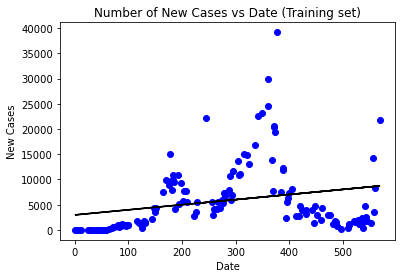

In [10]:
#Visualising Training Set Result
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Number of New Cases vs Date (Training set)')
plt.xlabel('Date')
plt.ylabel('New Cases')

plt.savefig('nctrain.png', dpi=600)

plt.show()

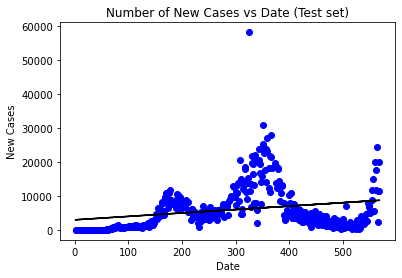

In [11]:
#Visualising Test Set Result
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Number of New Cases vs Date (Test set)')
plt.xlabel('Date')
plt.ylabel('New Cases')

plt.savefig('nctest.png', dpi=600)

plt.show()

In [12]:
predicted_value = regressor.predict([[352]])
predicted_value = np.floor(predicted_value)
print(predicted_value)

[6531.]


In [15]:
dataset[:352]

,date,NewCases
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
347,348,14057
348,349,16019
349,350,23104
350,351,30992


In [13]:
print(regressor.coef_)
print(regressor.intercept_)

[10.10355705]
2974.6678795688304
